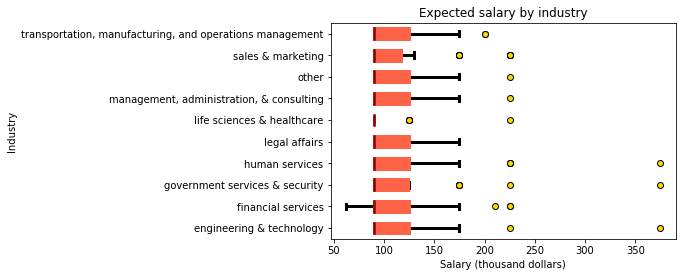

In [9]:
#Make a box and whisker plot for salaries by industry
#only 5% of jobs had salary reported (means important to know what to expect when offered)
from get_industries_func import *
import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv('data_scientist_united_states_job_postings_jobspikr.csv')
raw_data['category'] = new_categories()
data = raw_data[pd.notnull(raw_data['salary_offered'])]
data = data[data.salary_offered != 'Negotiable']
data = data[data.salary_offered != 'Salary Range: Undisclosed']
data = data.drop([2069], axis=0)
list_sal=list(data['salary_offered'])
for i in range(len(list_sal)):
    x = ''.join([c for c in list_sal[i] if c in '1234567890-'])
    hi_lo= x.split('-');
    hi_lo=[float(k) for k in hi_lo];
    if hi_lo[1]-hi_lo[0]>400:   #remove erroneous salary ranges
        hi_lo[1]=hi_lo[0]
    list_sal[i]=sum(hi_lo)/2
    if list_sal[i]>10000:
        list_sal[i]=float(list_sal[i])/1000
data['salary']=list_sal
data = data[data.category != 'education']
data= data[data.category != 'arts & entertainment']
#Boxplot formatting
green_diamond = dict(markerfacecolor='gold', marker='o')
boxprops = dict(linewidth=3, color='darkgoldenrod')
medianprops = dict(color='red',linewidth=2.5)
whiskerprops = dict(linewidth=3, color='firebrick')
boxplot=data.boxplot(column='salary', by='category',grid=False, fontsize=10,vert=False,
                    boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, 
                    capprops=whiskerprops, flierprops=green_diamond,
                    patch_artist=True,return_type='dict')
[[item.set_color('tomato') for item in boxplot[key]['boxes']] for key in boxplot.keys()]
[[item.set_color('darkred') for item in boxplot[key]['medians']] for key in boxplot.keys()]
[[item.set_color('k') for item in boxplot[key]['whiskers']] for key in boxplot.keys()]
[[item.set_color('k') for item in boxplot[key]['caps']] for key in boxplot.keys()]
plt.title('Expected salary by industry')
plt.suptitle('')
plt.ylabel('Industry')
plt.xlabel('Salary (thousand dollars)')
plt.show()
#Save boxchart
#plt.savefig('myboxchart.png', dpi=1200,transparent=True, bbox_inches='tight') 

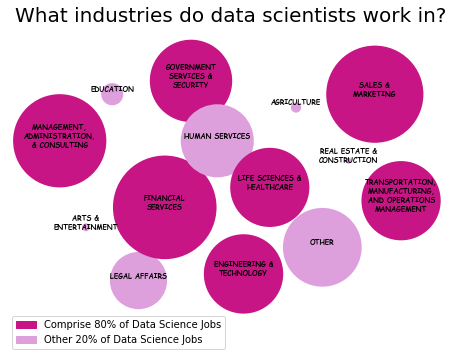

In [12]:
#Make a bubble plot of the industries. Larger bubbles=more jobs in that industry
import matplotlib.pyplot as plt
import textwrap
import matplotlib.patches as mpatches
import pandas as pd

new_data_cat=new_categories()
indus=new_data_cat.groupby('category')['category'].count().reset_index(name='Count')
#indus=indus.sort_values(by='Count', ascending=False)
indus['percent']=[0, 0, 0, 80, 80, 80, 0, 0, 80, 80, 0, 0, 80, 80]
b, c = indus.iloc[0].copy(), indus.iloc[9].copy() #swap some rows for appearance
indus.iloc[0],indus.iloc[9] = c,b
b, c = indus.iloc[3].copy(), indus.iloc[7].copy()
indus.iloc[3],indus.iloc[7] = c,b
colors=[]
for i in indus['percent']:
    if i == 0:
        colors.append('plum')
    else:
        colors.append('mediumvioletred')
alist=list(range(indus['category'].size))
alist2=[1250, 600, 1600, 200, 750, 1700, 1250, 250, 900, 1500, 450, 1100, 1600, 800]
myxaxis=pd.Series(alist)
myyaxis=pd.Series(alist2)
#plot attributes
plt.figure(figsize=(8,6))
plt.title('What industries do data scientists work in?', fontdict={'fontsize':20})
plt.ylim(-350,2100)
plt.xlim(-2, 15)
plt.scatter(myxaxis,myyaxis, s=indus.Count*7,c=colors,edgecolor='None')
x,y=myxaxis,myyaxis
for i, txt in enumerate (indus['category']):
    s=''
    for k in textwrap.wrap(txt,width=15):
        s=s+k+'\n'
    plt.annotate(s.upper(),(x[i],y[i]), wrap=True, weight='bold', size=7, horizontalalignment='center',
                  verticalalignment='center', fontstretch='semi-condensed', family='fantasy')
leg=[mpatches.Patch(color='mediumvioletred', label='Comprise 80% of Data Science Jobs'), mpatches.Patch(color='plum', label='Other 20% of Data Science Jobs')]
plt.legend(handles=leg, loc='lower left')
plt.axis('off')
plt.show()
#Save bubblechart
#plt.savefig('mybubblechart.png', dpi=1200,transparent=True) 